In [26]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('seaborn')

fileroot = 'C:/Users/MarkoU/Documents/_Msc/11. Dissertation/Analysis_Data/'
kcf      = fileroot + 'Killchain Across Years.csv'

# Killchain Analysis

In [27]:
# Extract the details we want
kc = pd.read_csv(kcf).sort_values(['FromType','KcOrder'], ascending=True)
kc.head()

,FromType,Killchain,KcOrder,2018,2019,2020,2021
0,Malware,Initial Access,3,0,1,2,9
1,Malware,Execution,4,8,21,25,57
2,Malware,Persistence,5,0,2,26,46
3,Malware,Privilege Escalation,6,3,6,32,63
4,Malware,Defense Evasion,7,7,17,43,100


In [39]:
# Format the two datasets ready for plotting
kc4 = kc
kc4 = kc4.drop(['KcOrder'], axis=1)

mal   = kc4[kc4['FromType'] == 'Malware'].drop(['FromType'], axis=1).set_index('Killchain')
toolz = kc4[kc4['FromType'] == 'Tool'   ].drop(['FromType'], axis=1).set_index('Killchain')
kcAll = kc4.groupby(['Killchain']).sum() 

#kcAll.info()

# Show all items in single table

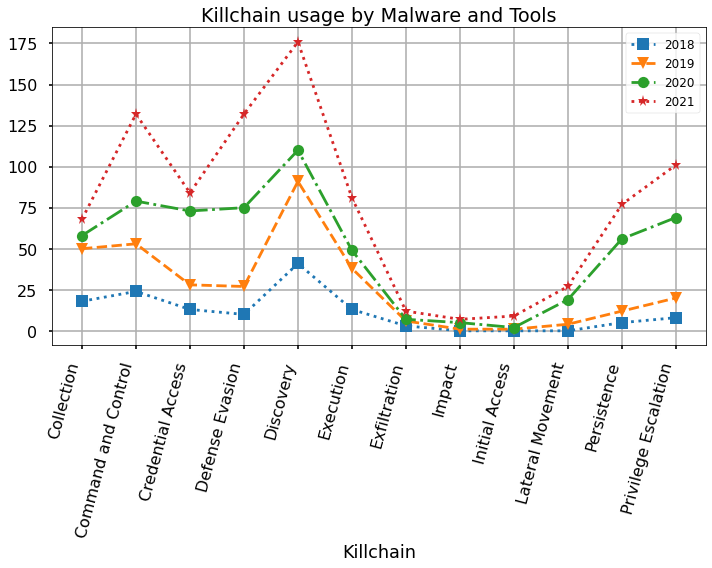

In [38]:
fh = 8    # figure height
fw = 10   # figure width

with plt.style.context('seaborn-poster'):
    
    styles={'2018': ':s', '2019': '--v', '2020': '-.o', '2021': ':*'}
    fig, ax = plt.subplots()

    for column in styles:
        kcAll[column].plot(ax=ax, style=styles[column], 
                         #linewidth=2,
                         title='Killchain usage by Malware and Tools',
                         legend=True,
                         grid=True);
        
        ax.set_xticks(range(0,12))
        ax.set_xticklabels(kcAll.index, rotation=75, ha='right')
        ax.legend(loc='upper right', fontsize=12)
    
    fig.set_figheight(fh)
    fig.set_figwidth(fw)
    fig.set_facecolor('w')

    fig.tight_layout();

# Show Malware and Tools seperately

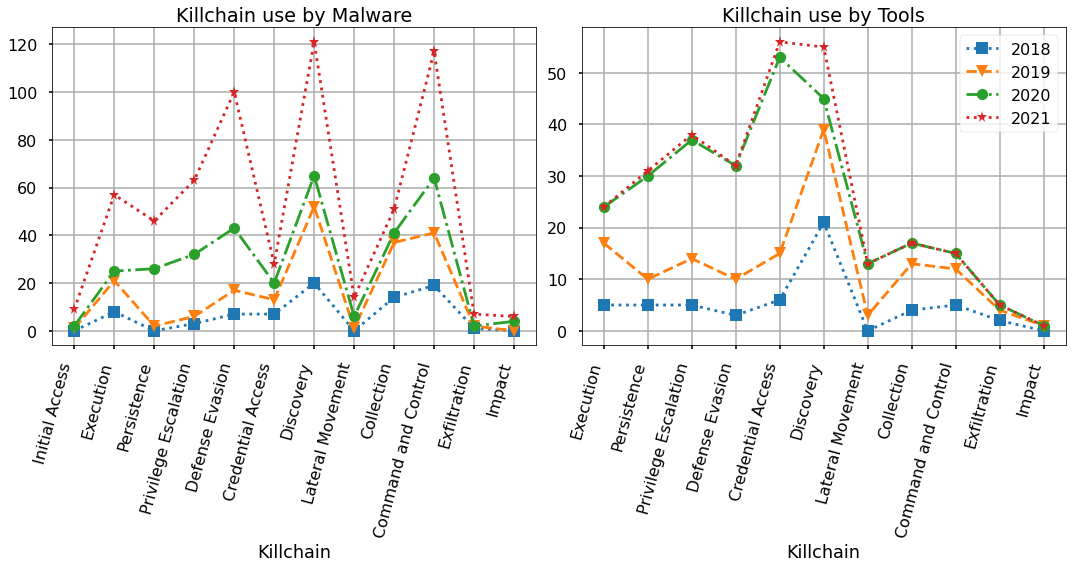

In [36]:
fh = 8    # figure height
fw = 15   # figure width

with plt.style.context('seaborn-poster'):
    
    styles={'2018': ':s', '2019': '--v', '2020': '-.o', '2021': ':*'}
    fig, (ax1, ax2) = plt.subplots(1,2, sharey=False)

    for column in styles:
        mal[column].plot(ax=ax1, style=styles[column], 
                         #linewidth=2,
                         title='Killchain use by Malware',
                         legend=False,
                         grid=True);
        
        toolz[column].plot(ax=ax2, style=styles[column], 
                         #linewidth=2,
                         title='Killchain use by Tools',
                         legend=True,
                         grid=True); 
        
        ax1.set_xticks(range(0,12))
        ax1.set_xticklabels(mal.index, rotation=75, ha='right') 
        
        ax2.set_xticks(range(0,11))
        ax2.set_xticklabels(toolz.index, rotation=75, ha='right')
    
    #for line in ax.get_lines():
    #    if line.get_label() == '2021':
    #        line.set_linewidth(3)
fig.set_figheight(fh)
fig.set_figwidth(fw)
fig.set_facecolor('w')
    
fig.tight_layout();

### Both, shown vertically

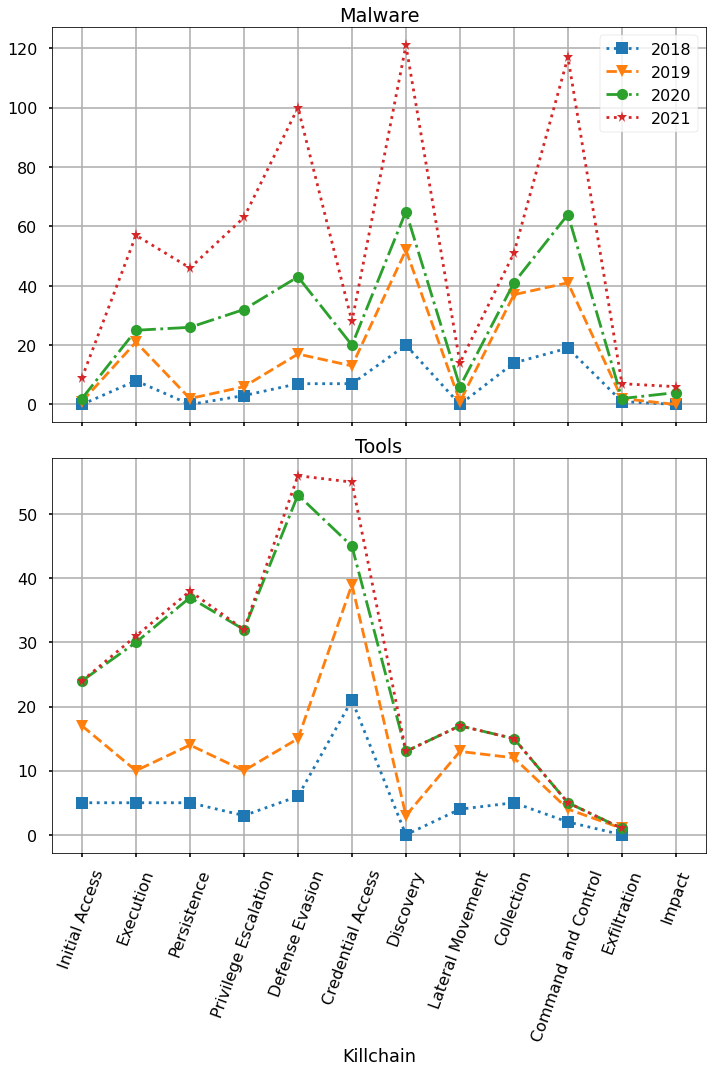

In [9]:
fh = 15   # figure height
fw = 10   # figure width

with plt.style.context('seaborn-poster'):
    
    styles={'2018': ':s', '2019': '--v', '2020': '-.o', '2021': ':*'}
    fig, ax = plt.subplots(2, sharex=True)

    for column in styles:
        mal[column].plot(ax=ax[0], style=styles[column], 
                         #linewidth=2,
                         title='Malware',
                         legend=True,
                         grid=True);
        
        toolz[column].plot(ax=ax[1], style=styles[column], 
                         #linewidth=2,
                         title='Tools',
                         legend=False,
                         grid=True); 
        
        ax[1].set_xticks(range(0,11))
        ax[1].set_xticklabels(toolz.index, rotation=70)
    
    #for line in ax.get_lines():
    #    if line.get_label() == '2021':
    #        line.set_linewidth(3)

fig.set_figheight(fh)
fig.set_figwidth(fw)
fig.set_facecolor('w')
    
fig.tight_layout();